In [3]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>



#  Дисперсионный анализ

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


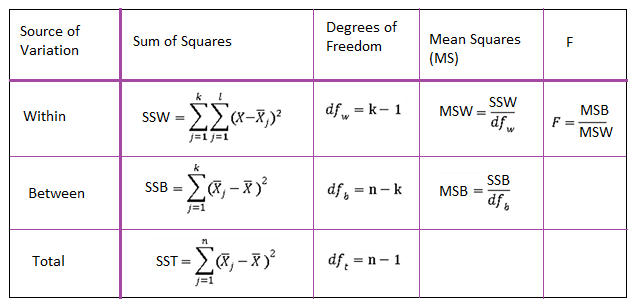

In [ ]:
from IPython.display import Image
Image("var_analysis.png")

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 12.0


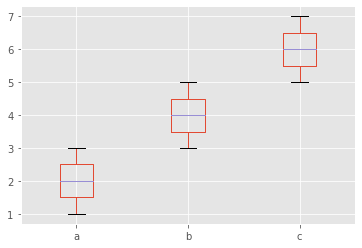

In [ ]:
# Выборки которые надо сравнить
data =\
    pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

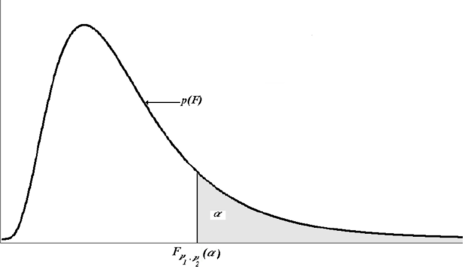

In [ ]:
# Распределение F-значения
Image('fisher_dist.png')

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/ 



<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

In [ ]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


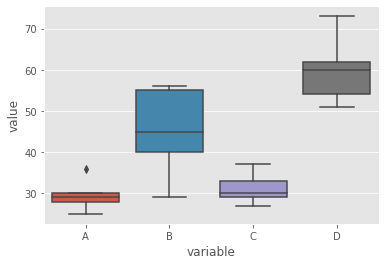

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(df))

In [ ]:
from scipy import stats

t, p = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
t, p

(17.492810457516338, 2.639241146210922e-05)

In [ ]:
t, p = stats.f_oneway(df['A'], df['C'])
t, p

(0.40634920634920635, 0.5416380250488471)

In [ ]:
t, p = stats.f_oneway(df['B'], df['D'])
t, p

(5.681818181818182, 0.044292181872168566)

Выводы:

Если проводить анализ всех угрпп, то мы должны отклонить нулевую гипотезу.

Если брать анализ подгрупп А и С, то не отклоняем для этих груп нулевую гипотезу, они очень похожи друг с другом

<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [ ]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976,
             0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [ ]:
t, p = stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)
t, p

(7.121019471642447, 0.0002812242314534544)

In [ ]:
greb = pd.DataFrame([tvarminne, newport, petersburg, magadan, tvarminne]).T
greb.columns = ['tvarminne', 'newport', 'petersburg', 'magadan', 'tvarminne']
greb

,tvarminne,newport,petersburg,magadan,tvarminne
0,0.0703,0.0873,0.0974,0.1033,0.0703
1,0.1026,0.0662,0.1352,0.0915,0.1026
2,0.0956,0.0672,0.0817,0.0781,0.0956
3,0.0973,0.0819,0.1016,0.0685,0.0973
4,0.1039,0.0749,0.0968,0.0677,0.1039
5,0.1045,0.0649,0.1064,0.0697,0.1045
6,NaN,0.0835,0.1050,0.0764,NaN
7,NaN,0.0725,NaN,0.0689,NaN


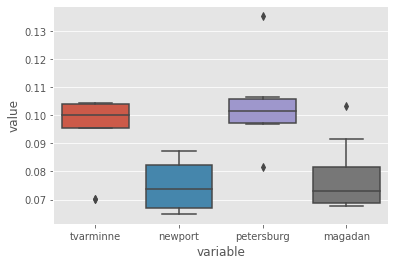

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(greb))

# почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выбрке**

Чтобы выяснить это, сделаем эксперемент.

In [1]:
from numpy import random
from scipy.stats import t

def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2) /
                              N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)

    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, labels=unique, autopct='%.0f%%')

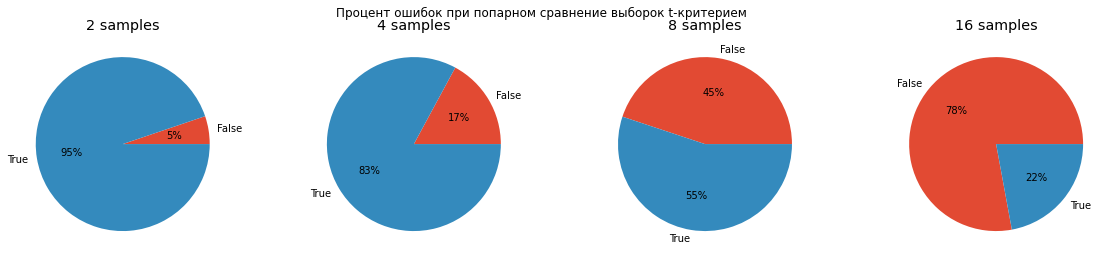

In [4]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 30, ax)
    ax.set_title(f'{n} samples')
    

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2) # делим на число сравнений = ((n*(n-1))/2) - поправка Бонферрони 
    pair_t_test(1000, n, 30, ax, alpha)
    ax.set_title(f'{n} samples')

Однако в данном случае эта будет арх-консервативная корректировавка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.


# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

import scipy.stats as stats

alpha = 0.05

t, p = stats.ttest_rel(A, B)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

отклоняем нулевую гипотезу


Выводы:

Т.к. у нас зависимые выборки, то тест Стьюдента применять некорректно.
Выборки имеют одинаковое среднее значение

Тут попробовал сделать сравнение тестов парный tt_test для связанных выборок, несмотря на то, что средние равны и дисперсионный анализ.

Корректнее применять дисперсионный анализ.


(array([2., 1., 1., 1., 0., 2., 1., 1., 1., 2., 3., 0., 3., 5., 2., 3., 2.,
        3., 0., 5., 4., 6., 3., 7., 1., 3., 2., 3., 4., 4., 2., 3., 1., 2.,
        3., 4., 1., 1., 2., 0., 0., 2., 1., 0., 0., 0., 0., 2., 0., 1.]),
 array([-99.92486747, -94.57752848, -89.23018949, -83.8828505 ,
        -78.53551152, -73.18817253, -67.84083354, -62.49349455,
        -57.14615556, -51.79881657, -46.45147758, -41.10413859,
        -35.7567996 , -30.40946061, -25.06212162, -19.71478263,
        -14.36744364,  -9.02010466,  -3.67276567,   1.67457332,
          7.02191231,  12.3692513 ,  17.71659029,  23.06392928,
         28.41126827,  33.75860726,  39.10594625,  44.45328524,
         49.80062423,  55.14796322,  60.4953022 ,  65.84264119,
         71.18998018,  76.53731917,  81.88465816,  87.23199715,
         92.57933614,  97.92667513, 103.27401412, 108.62135311,
        113.9686921 , 119.31603109, 124.66337007, 130.01070906,
        135.35804805, 140.70538704, 146.05272603, 151.40006502,
      

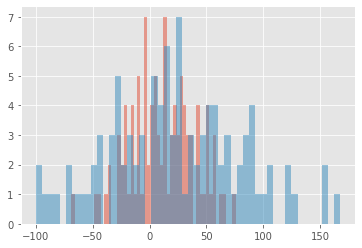

In [ ]:
plt.hist(A, bins=50, alpha=0.5)
plt.hist(B, bins=50, alpha=0.5)

<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

t, p = stats.wilcoxon(A, B)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

отклоняем нулевую гипотезу


(array([2., 1., 1., 1., 0., 2., 1., 1., 1., 2., 3., 0., 3., 5., 2., 3., 2.,
        3., 0., 5., 4., 6., 3., 7., 1., 3., 2., 3., 4., 4., 2., 3., 1., 2.,
        3., 4., 1., 1., 2., 0., 0., 2., 1., 0., 0., 0., 0., 2., 0., 1.]),
 array([-99.92486747, -94.57752848, -89.23018949, -83.8828505 ,
        -78.53551152, -73.18817253, -67.84083354, -62.49349455,
        -57.14615556, -51.79881657, -46.45147758, -41.10413859,
        -35.7567996 , -30.40946061, -25.06212162, -19.71478263,
        -14.36744364,  -9.02010466,  -3.67276567,   1.67457332,
          7.02191231,  12.3692513 ,  17.71659029,  23.06392928,
         28.41126827,  33.75860726,  39.10594625,  44.45328524,
         49.80062423,  55.14796322,  60.4953022 ,  65.84264119,
         71.18998018,  76.53731917,  81.88465816,  87.23199715,
         92.57933614,  97.92667513, 103.27401412, 108.62135311,
        113.9686921 , 119.31603109, 124.66337007, 130.01070906,
        135.35804805, 140.70538704, 146.05272603, 151.40006502,
      

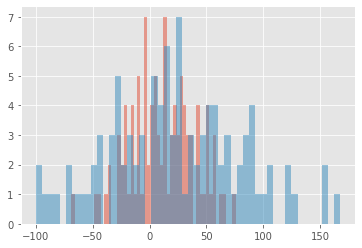

In [ ]:
plt.hist(A, bins=50, alpha=0.5)
plt.hist(B, bins=50, alpha=0.5)

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

t, p = stats.f_oneway(water, nutri, mineral)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

отклоняем нулевую гипотезу


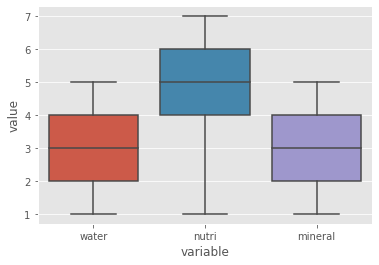

In [ ]:
cucu = pd.DataFrame([water, nutri, mineral]).T
cucu.columns = ['water', 'nutri', 'mineral']
sns.boxplot(x='variable', y='value', data=pd.melt(cucu))

Выводы:

Эффект от удобрений незначительный.

Так же на графиках видно, что результат немногим лучше на nutri.

<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



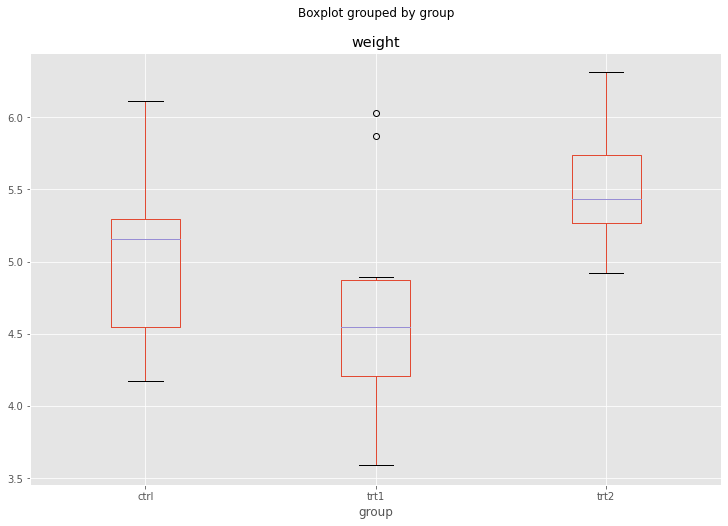

In [ ]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));


In [ ]:
data = data.set_index('Unnamed: 0')
data.head()

,weight,group
Unnamed: 0,,
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [ ]:
ctrl = data[data['group'] == 'ctrl']
trt1 = data[data['group'] == 'trt1']
trt2 = data[data['group'] == 'trt2']

In [ ]:
t, p = stats.f_oneway(ctrl['weight'], trt1['weight'], trt2['weight'])
print(t, p)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

4.846087862380136 0.0159099583256229
отклоняем нулевую гипотезу


Выводы:

Из графиков видно, что trt2 дает лучший результат.

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [ ]:
data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [ ]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [ ]:
# Ваши выводы

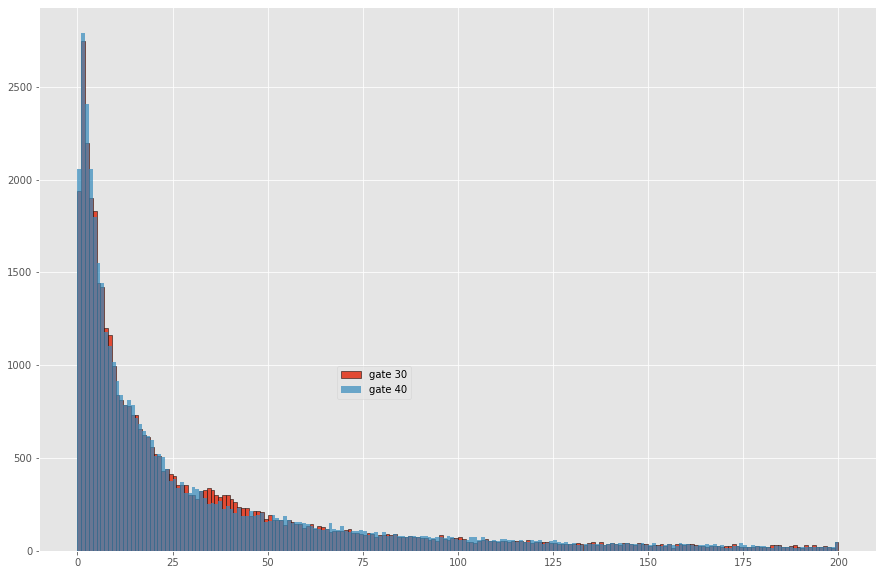

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

In [ ]:
# Ваши выводы/гипотезы

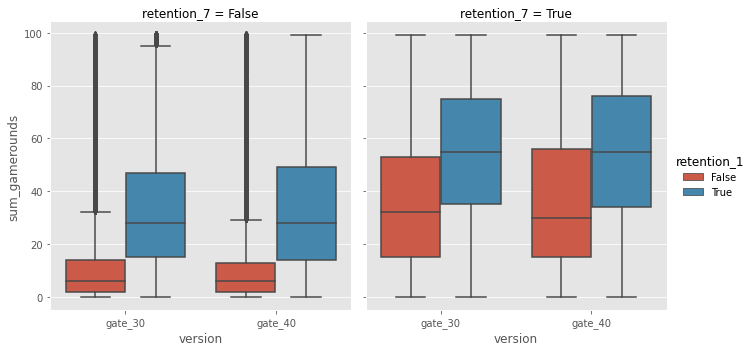

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [ ]:
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код.
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'],
                data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

<div class="alert alert-info">
<b>Задание: Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот. </b>
</div>


In [ ]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код.

**Ваши выводы?** 

<Figure size 1080x720 with 0 Axes>

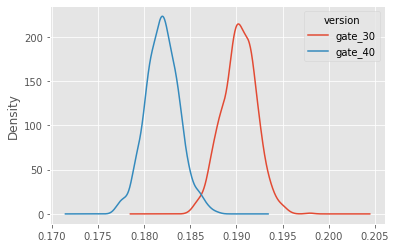

In [ ]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
# сделайте выводы, используя t-тест для retention_1 и retention_7

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
grass = pokemon.loc[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock') ]
rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')]

In [ ]:
t, p = stats.f_oneway(grass['Attack'], rock['Attack'])
t, p


if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

# Предположение о том, что покемоны класса grass имеют большую атаку можно отклонить
# Необходимо проверить так ли это еще раз и убедиться на графиках

отклоняем нулевую гипотезу


<Figure size 1080x720 with 0 Axes>

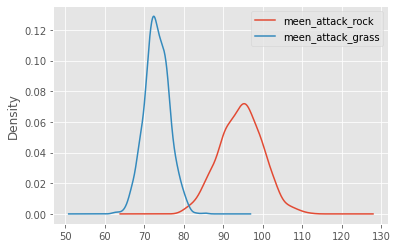

In [ ]:
plt.figure(figsize=(15, 10))

boot_grass = []
boot_rock = []
for i in range(1000):
    boot_mean_grass = grass['Attack'].sample(frac=1, replace=True).mean()
    boot_grass.append(boot_mean_grass)
    boot_mean_rock = rock['Attack'].sample(frac=1, replace=True).mean()
    boot_rock.append(boot_mean_rock)

# Преобразование списка в DataFrame
boot_1d = {'meen_attack_rock': boot_rock, 'meen_attack_grass': boot_grass}

boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Выводы:

Мы отвеграем нулдевую гипотезу, на самом деле покемоны класса rock имеют более сильную атаку.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
water = pokemon.loc[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal') ]
normal = pokemon.loc[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')]

In [ ]:
t, p = stats.f_oneway(water['Speed'], normal['Speed'])
t, p
print(t, p)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

# Предположение о том, что покемоны класса water имеют большую скорость не отклоняем
# Необходимо проверить так ли это еще раз и убедиться на графиках

2.454787240998446 0.11869444763401381
НЕ отклоняем нулевую гипотезу


<Figure size 1080x720 with 0 Axes>

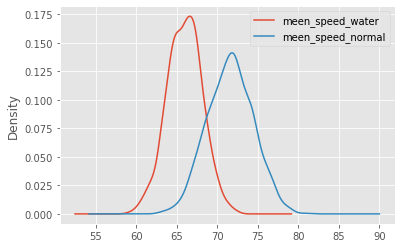

In [ ]:
plt.figure(figsize=(15, 10))

boot_water = []
boot_normal = []
for i in range(1000):
    boot_mean_water = water['Speed'].sample(frac=1, replace=True).mean()
    boot_water.append(boot_mean_water)
    boot_mean_normal = normal['Speed'].sample(frac=1, replace=True).mean()
    boot_normal.append(boot_mean_normal)

# Преобразование списка в DataFrame
boot_1d = {'meen_speed_water': boot_water, 'meen_speed_normal': boot_normal}

boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Выводы:

Покемоны класса normal в среднем имеют большую скорость

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
boost_pokemons = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)]
boost_pokemons

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [ ]:
t, p = stats.f_oneway(boost_pokemons['Speed'], pokemon['Speed'])
t, p
print(t, p)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

# С высокой долей вероятности сыворотка не сильно повлияла на скорость покемонов
# Для большей убежденности построим графики 

0.07130953747664617 0.7894740945036989
НЕ отклоняем нулевую гипотезу


<Figure size 1080x720 with 0 Axes>

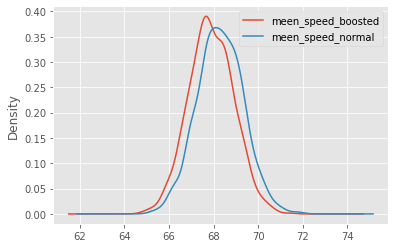

In [ ]:
plt.figure(figsize=(15, 10))

boot_boost = []
boot_pokemons = []
for i in range(1000):
    boot_mean_boost = boost_pokemons['Speed'].sample(frac=1, replace=True).mean()
    boot_boost.append(boot_mean_boost)
    boot_mean_normal = pokemon['Speed'].sample(frac=1, replace=True).mean()
    boot_pokemons.append(boot_mean_normal)

# Преобразование списка в DataFrame
boot_1d = {'meen_speed_boosted': boot_boost, 'meen_speed_normal': boot_pokemons}

boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Выводы:

Проанализировав датасеты всех покемонов и без покемонов с сывороткой можно сказать, что сыворотка не сильно повлияла на среднюю скорость.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon['sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['proizv'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,proizv
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [ ]:
legendary = pokemon.loc[pokemon['Legendary']]
not_legendary = pokemon.loc[~pokemon['Legendary']]

In [ ]:
t, p = stats.f_oneway(legendary['sum'], not_legendary['sum'])
t, p
print(t, p)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

# Дисперсионный анализ показал, что легендарные покемоны сильно лучше по сумме признаков чем обычные, построитм графики

134.37104128585798 7.970942205720804e-29
отклоняем нулевую гипотезу


In [ ]:
t, p = stats.f_oneway(legendary['proizv'], not_legendary['proizv'])
t, p
print(t, p)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

# Дисперсионный анализ показал, что легендарные покемоны сильно лучше по произведению признаков чем обычные, построитм графики

175.9138909709736 1.9926643088419018e-36
отклоняем нулевую гипотезу


<Figure size 1080x720 with 0 Axes>

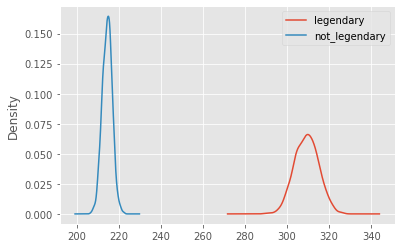

In [ ]:
plt.figure(figsize=(15, 10))

boot_boost = []
boot_pokemons = []
for i in range(1000):
    boot_mean_boost = legendary['sum'].sample(frac=1, replace=True).mean()
    boot_boost.append(boot_mean_boost)
    boot_mean_normal = not_legendary['sum'].sample(frac=1, replace=True).mean()
    boot_pokemons.append(boot_mean_normal)

# Преобразование списка в DataFrame
boot_1d = {'legendary': boot_boost, 'not_legendary': boot_pokemons}

boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

<Figure size 1080x720 with 0 Axes>

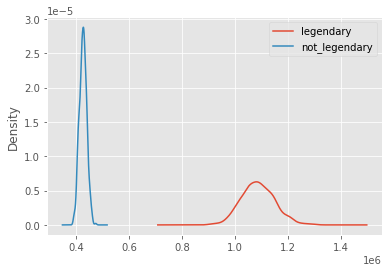

In [ ]:
plt.figure(figsize=(15, 10))

boot_boost = []
boot_pokemons = []
for i in range(1000):
    boot_mean_boost = legendary['proizv'].sample(frac=1, replace=True).mean()
    boot_boost.append(boot_mean_boost)
    boot_mean_normal = not_legendary['proizv'].sample(frac=1, replace=True).mean()
    boot_pokemons.append(boot_mean_normal)

# Преобразование списка в DataFrame
boot_1d = {'legendary': boot_boost, 'not_legendary': boot_pokemons}

boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Выводы:

Теория профессора не подтвердилась, легендарные покамоны заметно сильнее своих нелегендарных сородичей.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил 4 класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
ground = pokemon.loc[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
steel = pokemon.loc[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
ice = pokemon.loc[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]

In [ ]:
t, p = stats.f_oneway(rock['Defense'], ground['Defense'], steel['Defense'], ice['Defense'])
t, p
print(t, p)

if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

# Дисперсионный анализ показал, что у 4-х классов покемонов схожие значения устойчивости построитм графики

10.82012408304731 1.231528168152447e-06
отклоняем нулевую гипотезу


In [ ]:
result = pd.DataFrame({'rock': rock['Defense'], 'ground': ground['Defense'], 'steel': steel['Defense'], 'ice': ice['Defense']})
result.reset_index()

,index,rock,ground,steel,ice
0,32,NaN,85.0,NaN,NaN
1,33,NaN,110.0,NaN,NaN
2,36,NaN,87.0,NaN,NaN
3,39,NaN,77.0,NaN,NaN
4,55,NaN,25.0,NaN,NaN
...,...,...,...,...,...
184,788,NaN,NaN,NaN,85.0
185,789,NaN,NaN,NaN,184.0
186,794,NaN,121.0,NaN,NaN
187,795,150.0,NaN,NaN,NaN


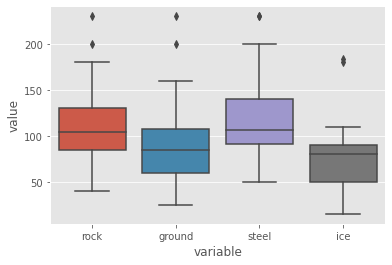

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(result))

Выводы:

Защита у групп действительно не сильно отличается.